<a href="https://colab.research.google.com/github/techrhea777/Data-Science-Projects/blob/main/DimReductPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###This code generates synthetic (healthcare-related) data, introduces correlation, adds noise, standardizes the data, applies PCA for dimensionality reduction, and then visualizes the original and reduced datasets. The scatter plots help visualize the relationships between features in the original and reduced spaces.

In [3]:
#  numpy: Numerical Python library for mathematical operations.
#   pandas: Data manipulation library for handling data in tabular form.
#   PCA from sklearn.decomposition: Principal Component Analysis for dimensionality reduction.
#   StandardScaler from sklearn.preprocessing: Standardization of the dataset.
#   matplotlib.pyplot: Plotting library for creating visualizations.


In [7]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
#Generating Synthetic Data:
#Using np.random.rand to generate random values between 0 and 1.
#Multiplying by 10 and adding 5 to get values in the range [5, 15).
#Creating a synthetic dataset with 1000 samples and 8 features.

In [6]:
# Generating synthetic healthcare-related data
np.random.seed(42)
num_samples = 1000
num_features = 8

In [8]:
# Creating a synthetic dataset with 8 features
data = np.random.rand(num_samples, num_features) * 10 + 5

In [9]:
#Introducing Correlation:
#Modifying some features to introduce correlation.
#For example, data[:, 1] is made twice of data[:, 0], and noise is added.

In [10]:
# Introducing correlation between features
data[:, 1] = 2 * data[:, 0] + np.random.randn(num_samples)
data[:, 3] = 0.5 * data[:, 2] + 3 * np.random.randn(num_samples)
data[:, 5] = -1.5 * data[:, 4] + 2 * np.random.randn(num_samples)

In [11]:
#Adding Noise:
#Adding random noise to the entire dataset to simulate real-world variations.

In [12]:
# Adding noise
data += np.random.randn(num_samples, num_features) * 2

In [14]:
#Creating DataFrame:
#Creating a pandas DataFrame for the synthetic data for better manipulation and visualization.

In [15]:
# Creating a DataFrame for visualization
columns = [f"Feature_{i+1}" for i in range(num_features)]
df = pd.DataFrame(data, columns=columns)

In [16]:
df.shape

(1000, 8)

In [17]:
#Visualize the created data

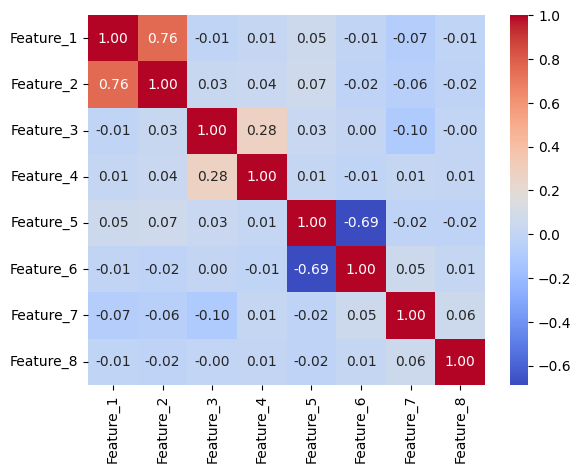

In [18]:
import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

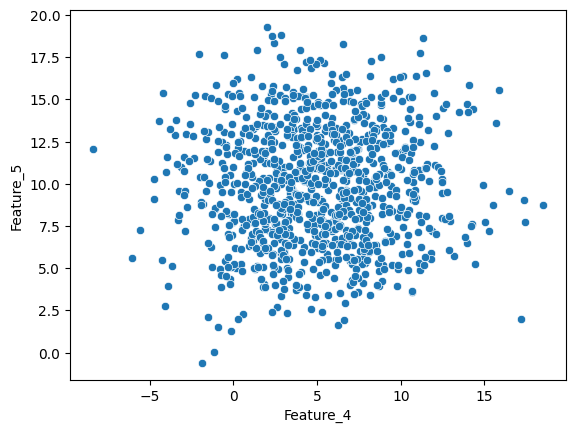

In [19]:
sns.scatterplot(x='Feature_4', y='Feature_5', data=df)
plt.show()

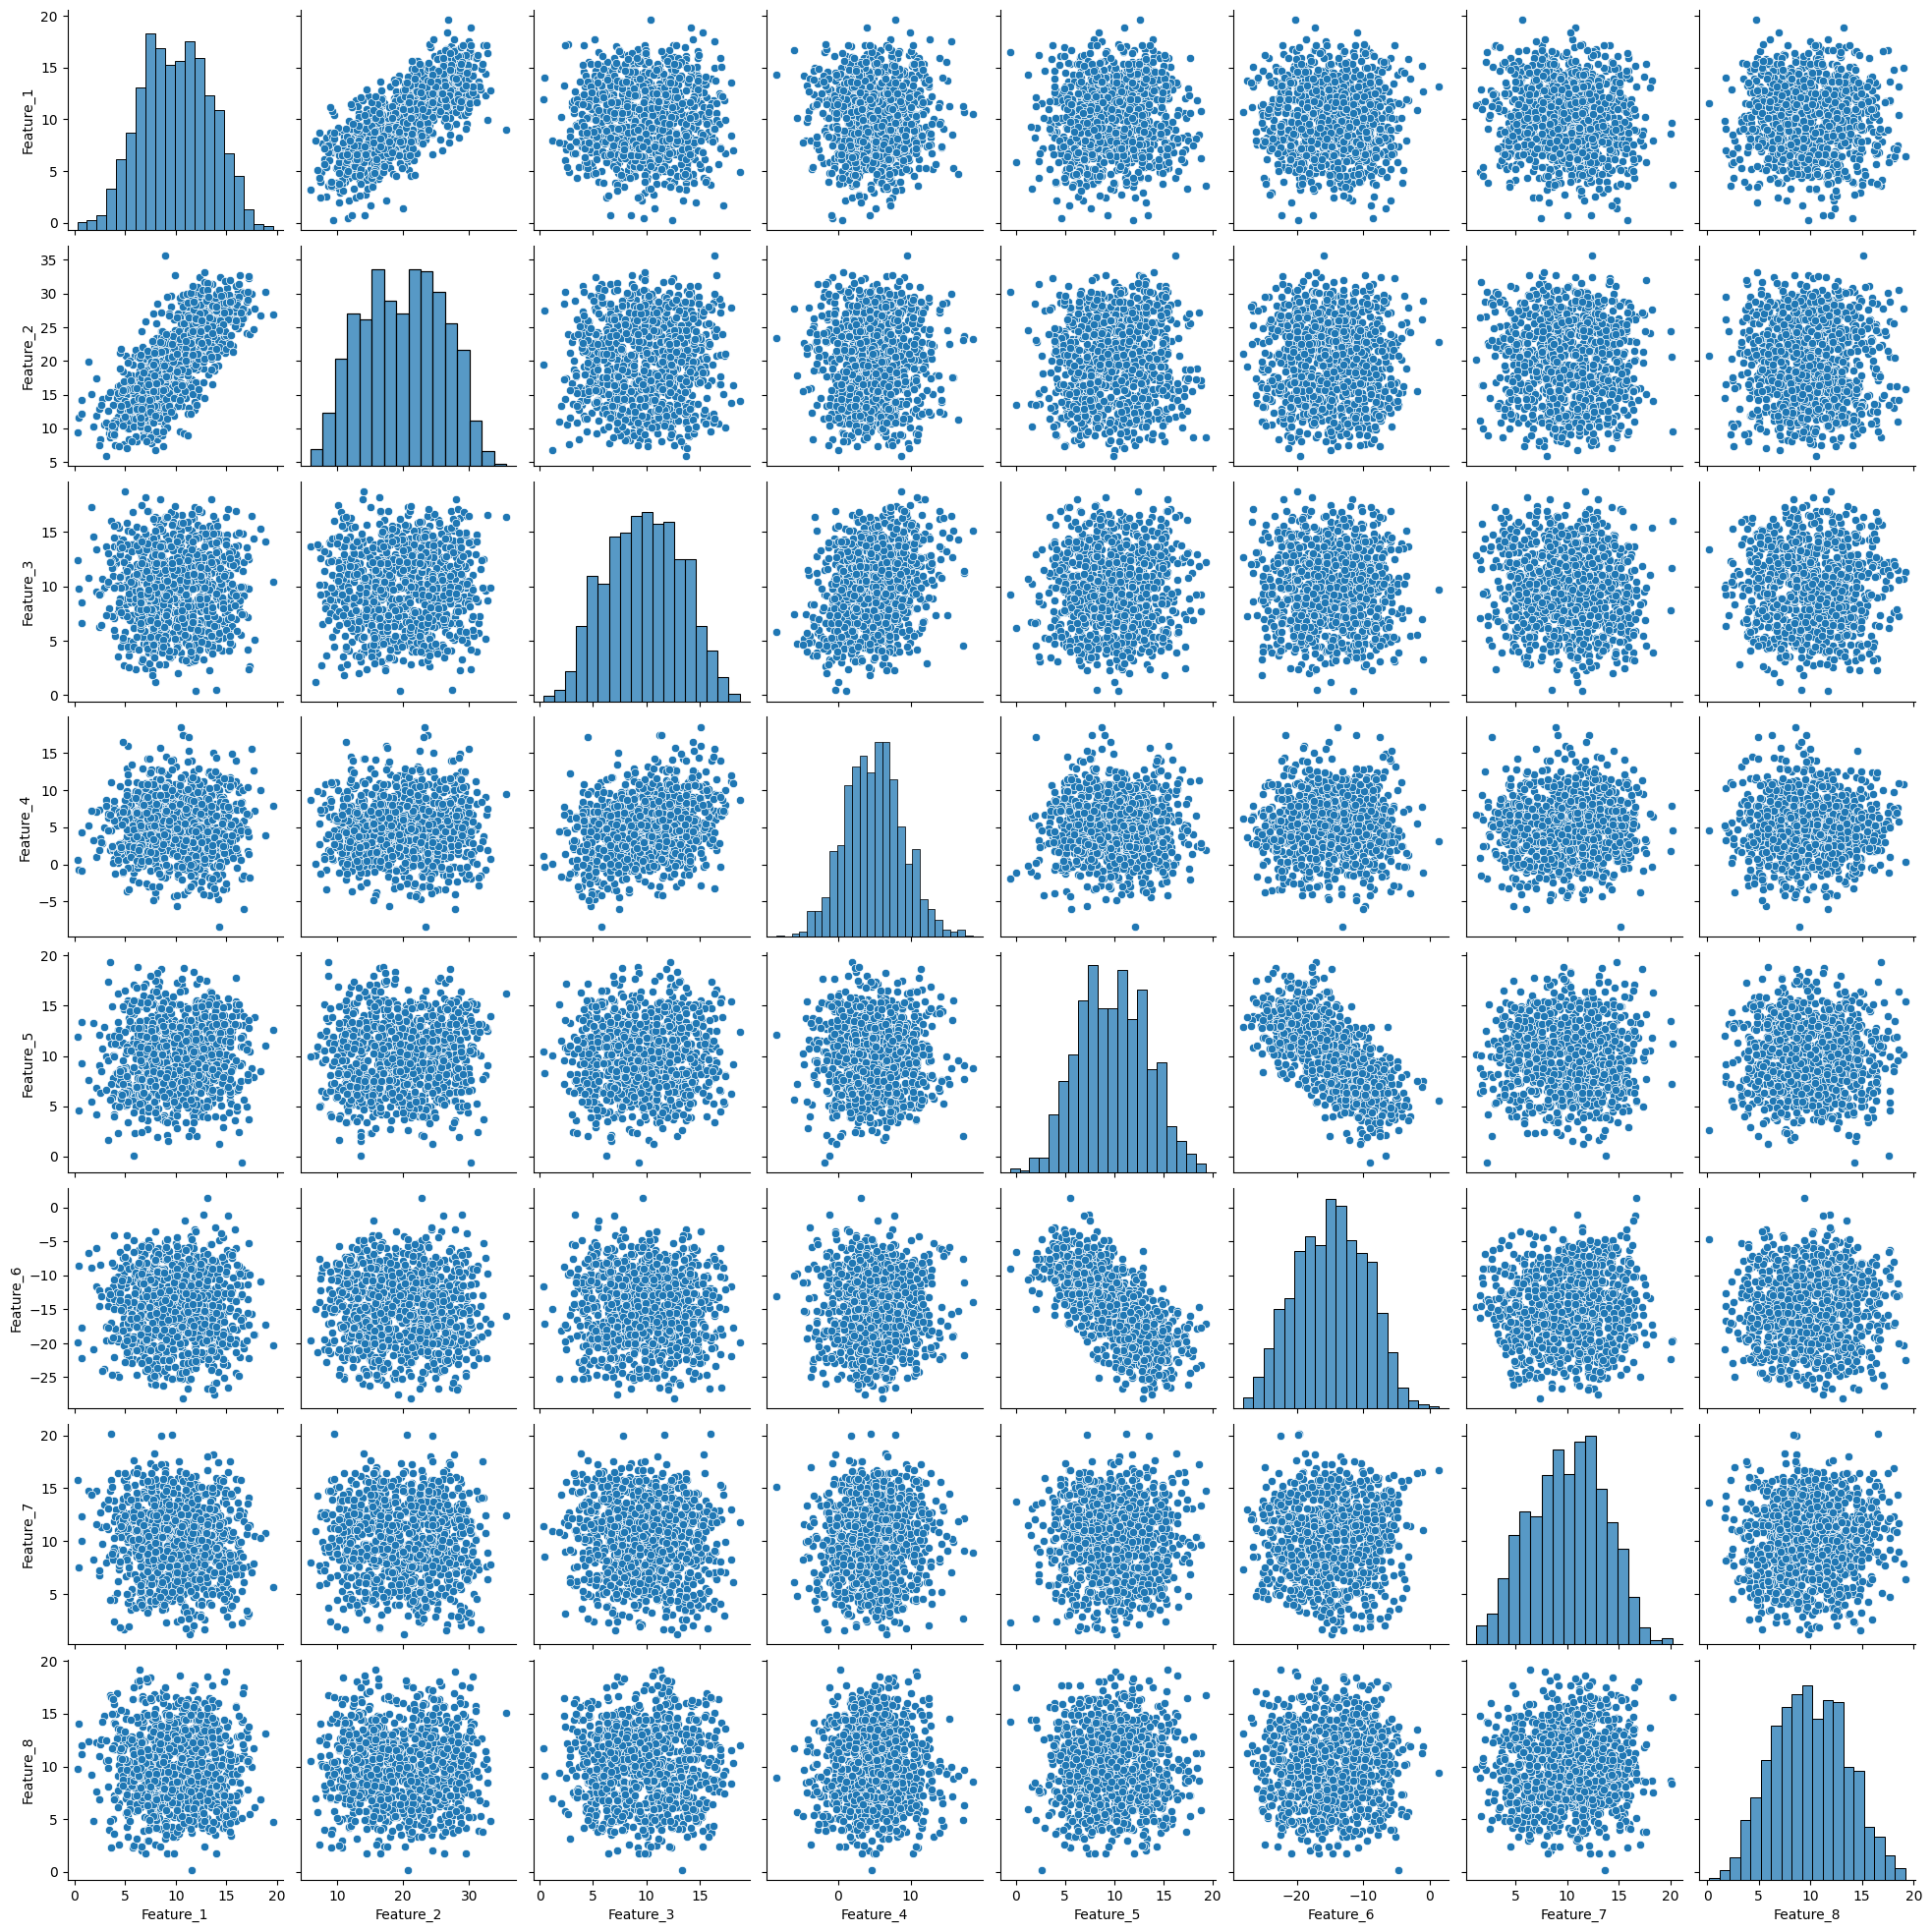

In [20]:
numerical_columns = df.columns[df.dtypes == 'float64']  # Adjust the dtype as needed

# Plotting scatterplots for each pair of features
sns.pairplot(df[numerical_columns])
plt.show()

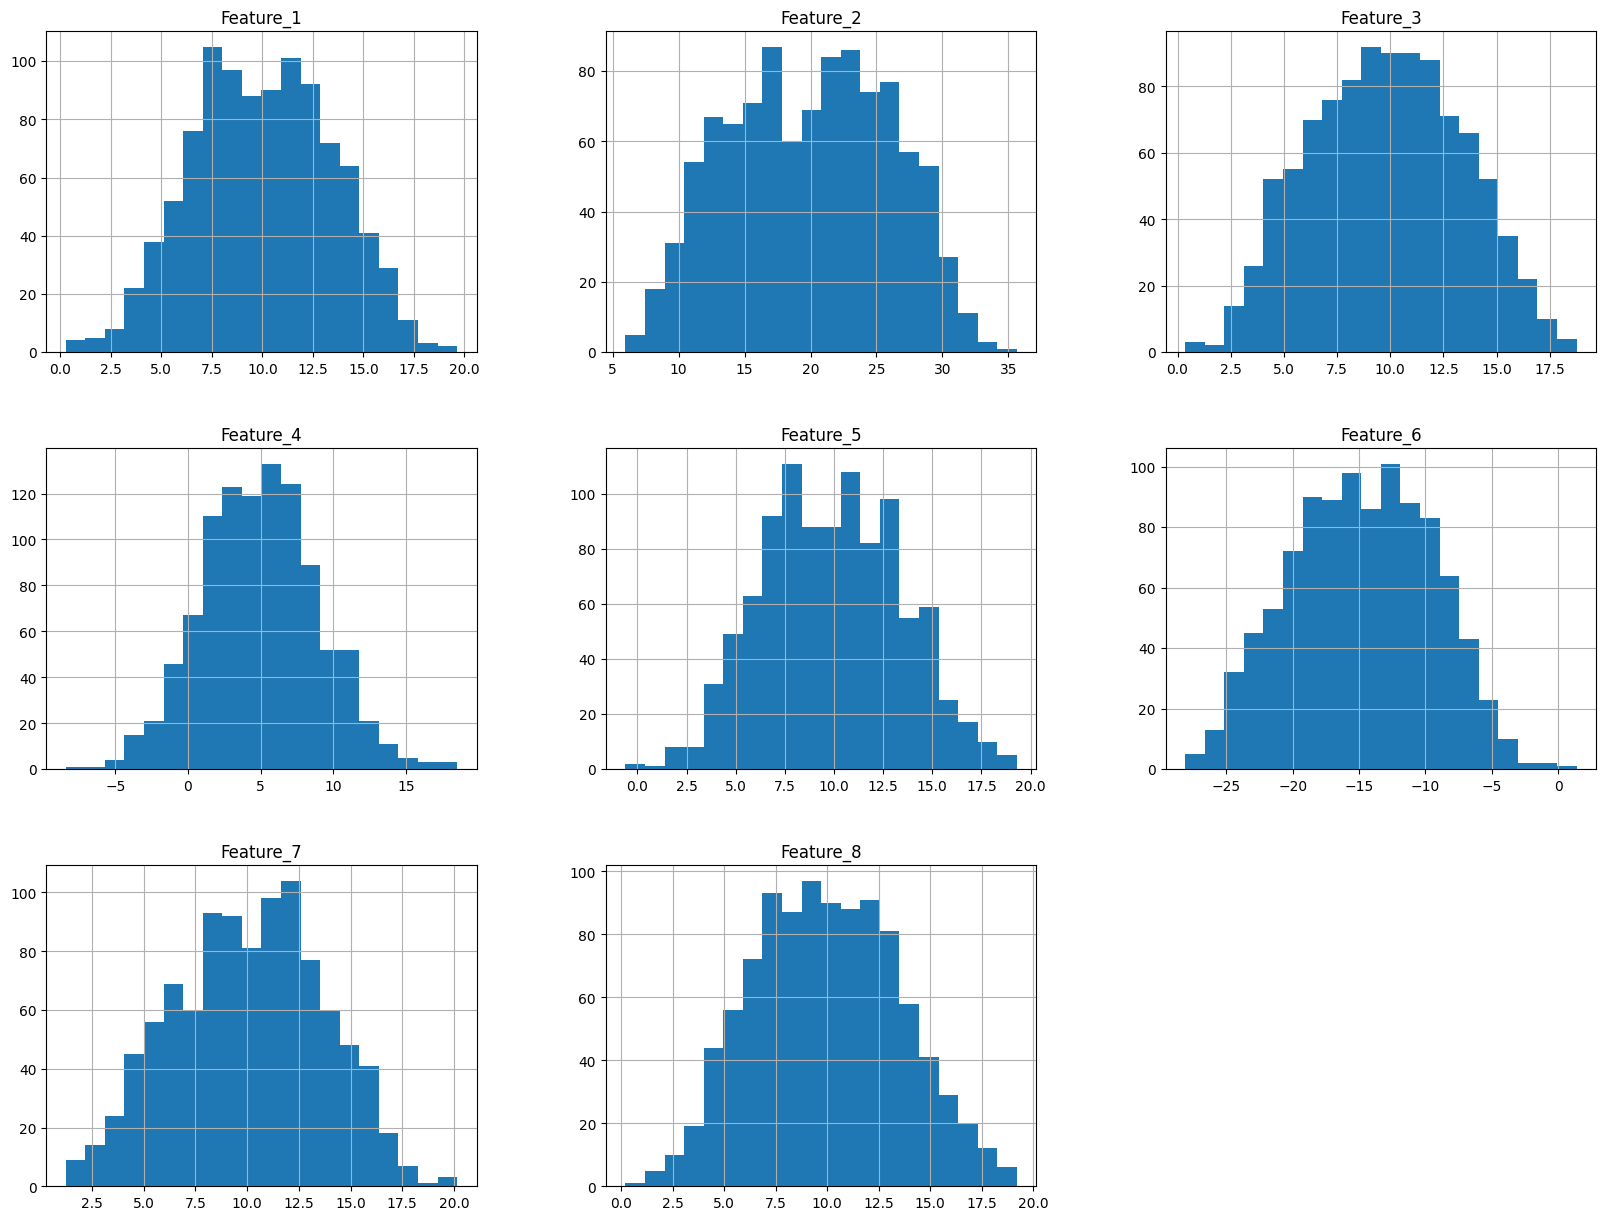

In [21]:
df.hist(bins=20, figsize=(20,15))
plt.show()

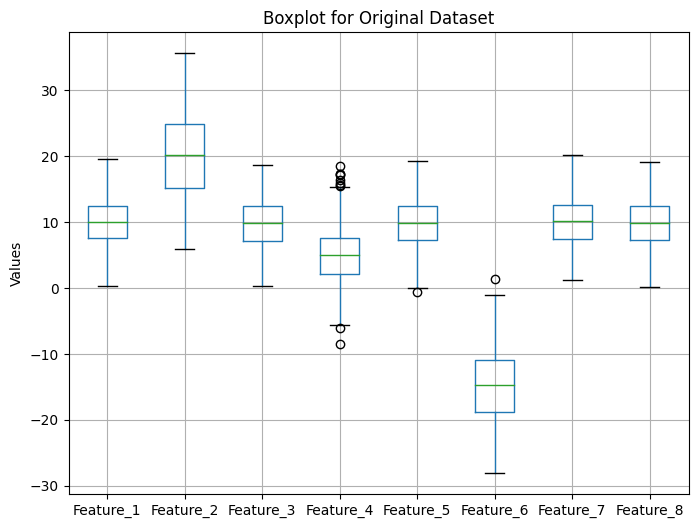

In [22]:
# Boxplot for the original dataset
plt.figure(figsize=(8, 6))
df.boxplot()
plt.title('Boxplot for Original Dataset')
plt.ylabel('Values')
plt.show()

In [23]:
# Standardizing the data (important for PCA)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

In [ ]:
#Applying PCA:
#Creating a PCA object with the desired number of components (2 in this case).
#Fitting the standardized data to PCA and transforming it to obtain the principal components.

In [24]:
# Applying PCA
pca = PCA(n_components=2)  # You can choose the number of components
principal_components = pca.fit_transform(data_standardized)

In [25]:
# Creating a DataFrame for the reduced dataset
df_reduced = pd.DataFrame(data=principal_components, columns=['PCI', 'PC2'])

In [26]:
#The dimension of 8 features is reduced to only two features

In [27]:
df_reduced.shape

(1000, 2)

Text(0, 0.5, 'Feature 2')

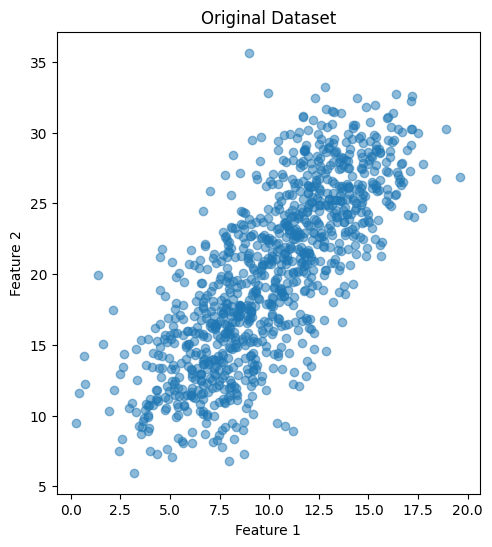

In [29]:



# Plotting the original dataset
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Feature_1'], df['Feature_2'], alpha=0.5)
plt.title('Original Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [36]:
df_reduced

,PCI,PC2
0,0.811828,0.466509
1,-1.963174,-0.866820
2,0.739364,-1.422377
3,-0.161191,-0.797341
4,1.518084,-0.691841
...,...,...
995,-2.104995,0.018734
996,1.177001,0.524188
997,-2.013759,1.508580
998,-0.138382,-1.614687


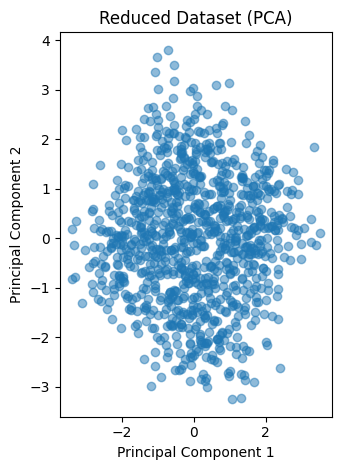

In [37]:
import matplotlib.pyplot as plt

# Assuming df_reduced is defined
plt.subplot(1, 2, 2)
plt.scatter(df_reduced['PCI'], df_reduced['PC2'], alpha=0.5)
plt.title('Reduced Dataset (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()
